In [25]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType,DoubleType, DateType
from datetime import date
schema = StructType([
StructField("order_id", StringType()),
StructField("region", StringType()),
StructField("category", StringType()),
StructField("quantity", IntegerType()),
StructField("price", IntegerType()),
StructField("order_date", DateType())
])
data = [
("O001", "South", "Electronics", 3, 15000, date(2025, 1, 5)),

("O002", "North", "Clothing", 5, 2000, date(2025, 1, 6)),
("O003", "East", "Furniture", 2, 12000, date(2025, 1, 7)),
("O004", "West", "Electronics", 1, 18000, date(2025, 1, 8)),
("O005", "North", "Furniture", 4, 9000, date(2025, 1, 10)),
("O006", "South", "Clothing", 6, 2500, date(2025, 1, 11)),
("O007", "East", "Electronics", 2, 17000, date(2025, 1, 12)),
("O008", "South", "Furniture", 5, 8500, date(2025, 1, 15)),
("O009", "West", "Clothing", 7, 3000, date(2025, 1, 17)),
("O010", "North", "Electronics", 4, 16000, date(2025, 1, 18))
]
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.createDataFrame(data, schema)
df.show(10)

+--------+------+-----------+--------+-----+----------+
|order_id|region|   category|quantity|price|order_date|
+--------+------+-----------+--------+-----+----------+
|    O001| South|Electronics|       3|15000|2025-01-05|
|    O002| North|   Clothing|       5| 2000|2025-01-06|
|    O003|  East|  Furniture|       2|12000|2025-01-07|
|    O004|  West|Electronics|       1|18000|2025-01-08|
|    O005| North|  Furniture|       4| 9000|2025-01-10|
|    O006| South|   Clothing|       6| 2500|2025-01-11|
|    O007|  East|Electronics|       2|17000|2025-01-12|
|    O008| South|  Furniture|       5| 8500|2025-01-15|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|
|    O010| North|Electronics|       4|16000|2025-01-18|
+--------+------+-----------+--------+-----+----------+



In [27]:
from pyspark.sql.functions import col,sum as _sum
df=df.withColumn("revenue",col("quantity")*col("price"))
df.show()

+--------+------+-----------+--------+-----+----------+-------+
|order_id|region|   category|quantity|price|order_date|revenue|
+--------+------+-----------+--------+-----+----------+-------+
|    O001| South|Electronics|       3|15000|2025-01-05|  45000|
|    O002| North|   Clothing|       5| 2000|2025-01-06|  10000|
|    O003|  East|  Furniture|       2|12000|2025-01-07|  24000|
|    O004|  West|Electronics|       1|18000|2025-01-08|  18000|
|    O005| North|  Furniture|       4| 9000|2025-01-10|  36000|
|    O006| South|   Clothing|       6| 2500|2025-01-11|  15000|
|    O007|  East|Electronics|       2|17000|2025-01-12|  34000|
|    O008| South|  Furniture|       5| 8500|2025-01-15|  42500|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|  21000|
|    O010| North|Electronics|       4|16000|2025-01-18|  64000|
+--------+------+-----------+--------+-----+----------+-------+



+-----------+-------------+
|   category|total_revenue|
+-----------+-------------+
|Electronics|       161000|
|   Clothing|        46000|
|  Furniture|       102500|
+-----------+-------------+



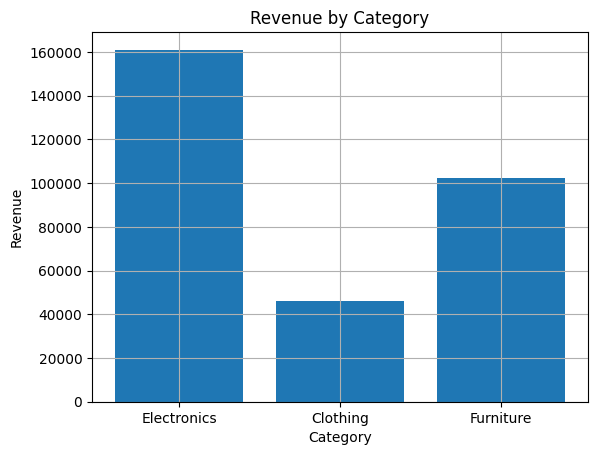

<Figure size 640x480 with 0 Axes>

In [102]:
rev_by_cat=df.groupBy("category").agg(_sum("revenue").alias("total_revenue"))
rev_by_cat.show()
import pandas
import matplotlib.pyplot as plt
pdf=rev_by_cat.toPandas()
plt.bar(pdf['category'],pdf['total_revenue'])
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category')
plt.grid(True)
plt.show()
plt.savefig("rev_cat_bar.png")

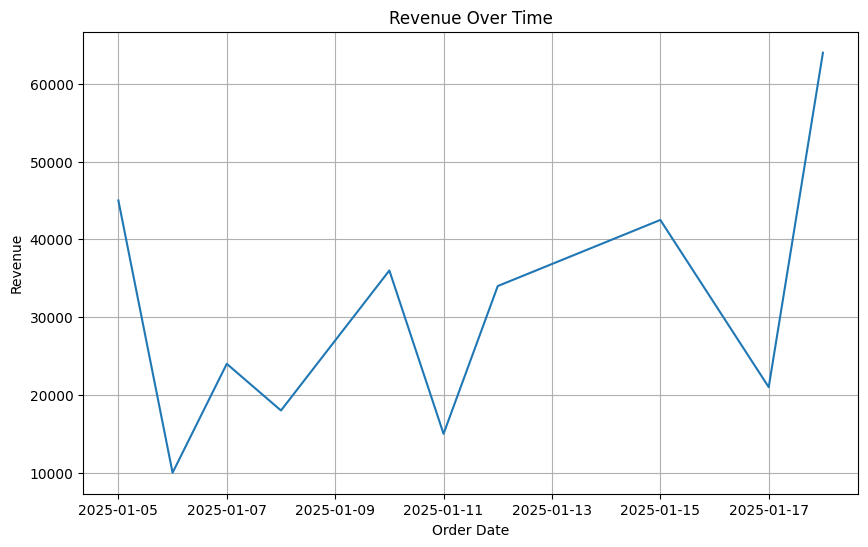

<Figure size 640x480 with 0 Axes>

In [101]:
tdf=df.toPandas()
plt.figure(figsize=(10,6))
plt.plot(tdf['order_date'],tdf['revenue'])
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.grid(True)
plt.show()
plt.savefig("line.png")

+------+-------------+
|region|total_revenue|
+------+-------------+
| South|       102500|
|  East|        58000|
|  West|        39000|
| North|       110000|
+------+-------------+



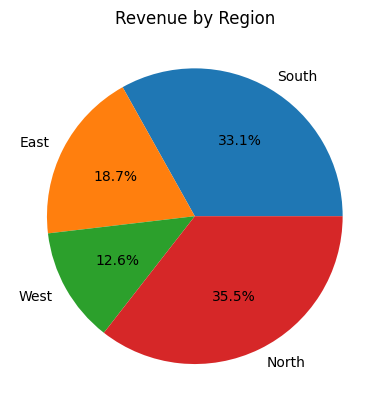

<Figure size 640x480 with 0 Axes>

In [100]:
region_rev=df.groupBy("region").agg(_sum("revenue").alias("total_revenue"))
region_rev.show()
rdf=region_rev.toPandas()
plt.pie(rdf['total_revenue'],labels=rdf['region'],autopct='%1.1f%%')
plt.title('Revenue by Region')
plt.show()
plt.savefig("pie.png")

+-----------+------+--------------+
|   category|region|total_quantity|
+-----------+------+--------------+
|  Furniture|  East|             2|
|   Clothing| North|             5|
|  Furniture| North|             4|
|Electronics| South|             3|
|Electronics|  West|             1|
|   Clothing|  West|             7|
|Electronics| North|             4|
|   Clothing| South|             6|
|Electronics|  East|             2|
|  Furniture| South|             5|
+-----------+------+--------------+

region       East  North  South  West
category                             
Clothing      0.0    5.0    6.0   7.0
Electronics   2.0    4.0    3.0   1.0
Furniture     2.0    4.0    5.0   0.0


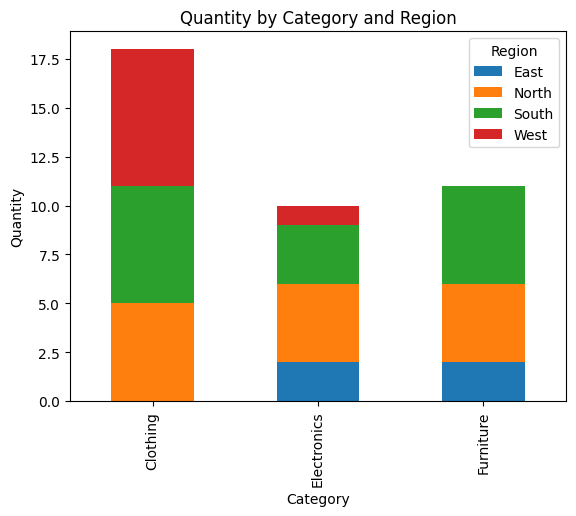

<Figure size 640x480 with 0 Axes>

In [99]:
qty_cat_reg=df.groupBy("category","region").agg(_sum("quantity").alias("total_quantity"))
qty_cat_reg.show()
qdf=qty_cat_reg.toPandas()
pivot_df=(qdf.pivot(index="category",columns="region",values="total_quantity").fillna(0))
print(pivot_df)
pivot_df.plot(kind='bar',stacked=True)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity by Category and Region')
plt.legend(title='Region')
plt.show()
plt.savefig("stackedbar.png")

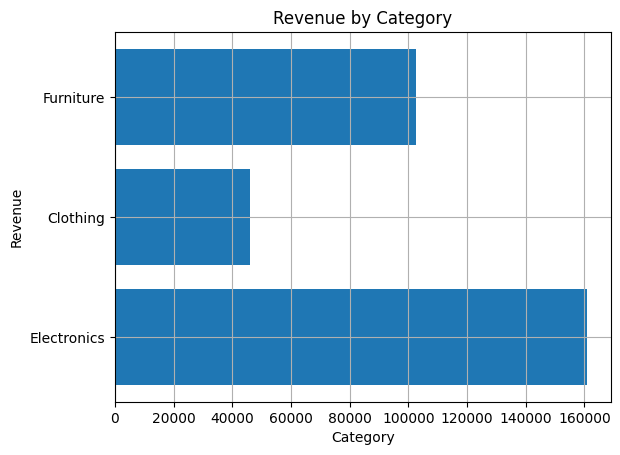

<Figure size 640x480 with 0 Axes>

In [98]:
#horizontal bar chart
plt.barh(pdf['category'],pdf['total_revenue'])
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category')
plt.grid(True)
plt.show()
plt.savefig("horizontal bar.png")

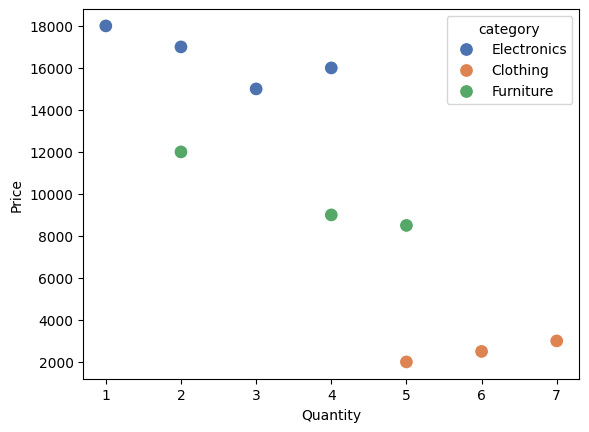

<Figure size 640x480 with 0 Axes>

In [96]:
ful_df=df.toPandas()
import seaborn as sns
sns.scatterplot(data=ful_df,x="quantity",y="price",hue="category",s=100,palette="deep")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()
plt.savefig("scater by quantity and price.png")

+------+------------------+
|region|       avg_revenue|
+------+------------------+
| South|34166.666666666664|
|  East|           29000.0|
|  West|           19500.0|
| North|36666.666666666664|
+------+------------------+



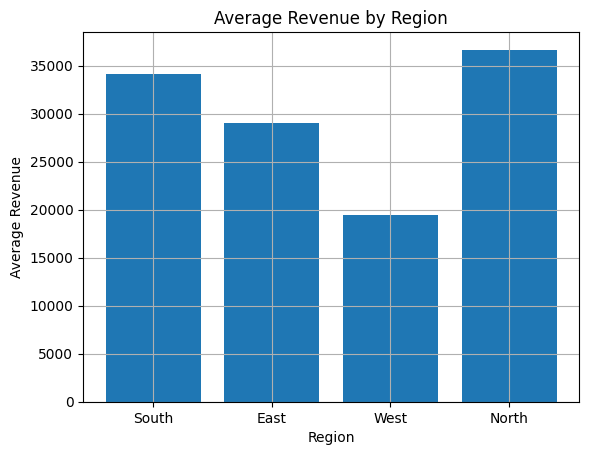

<Figure size 640x480 with 0 Axes>

In [95]:
avg_reg=df.groupBy("region").agg(avg("revenue").alias("avg_revenue"))
avg_reg.show()
adf=avg_reg.toPandas()
plt.bar(adf['region'],adf['avg_revenue'])
plt.xlabel('Region')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Region')
plt.grid(True)
plt.show()
plt.savefig("avg_revenue_region.png")

+------+-----------+-------------+
|region|   category|total_revenue|
+------+-----------+-------------+
| North|   Clothing|        10000|
|  West|Electronics|        18000|
|  East|  Furniture|        24000|
| South|Electronics|        45000|
| North|  Furniture|        36000|
| South|   Clothing|        15000|
| North|Electronics|        64000|
|  East|Electronics|        34000|
|  West|   Clothing|        21000|
| South|  Furniture|        42500|
+------+-----------+-------------+

category  Clothing  Electronics  Furniture
region                                    
East           0.0      34000.0    24000.0
North      10000.0      64000.0    36000.0
South      15000.0      45000.0    42500.0
West       21000.0      18000.0        0.0


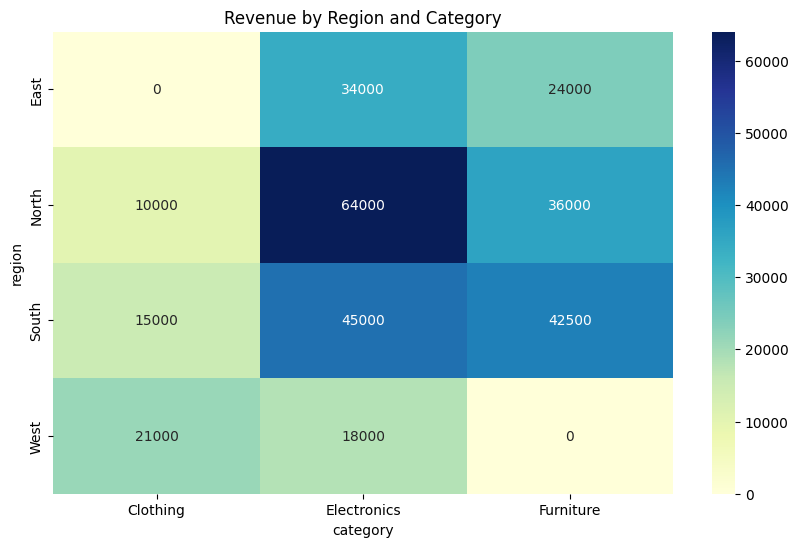

<Figure size 640x480 with 0 Axes>

In [94]:
rev_reg_cat=df.groupBy("region","category").agg(_sum("revenue").alias("total_revenue"))
rev_reg_cat.show()
rdf=rev_reg_cat.toPandas()
heat=rdf.pivot_table(index="region",columns="category",values="total_revenue").fillna(0)
print(heat)
plt.figure(figsize=(10,6))
sns.heatmap(heat,annot=True,cmap="YlGnBu",fmt=".0f")
plt.title("Revenue by Region and Category")
plt.show()
plt.savefig("heatmap.png")

,order_id,region,category,quantity,price,order_date,revenue,discounts_rate,rev_discounted
0,O001,South,Electronics,3,15000,2025-01-05,45000,0.10,40500.0
1,O002,North,Clothing,5,2000,2025-01-06,10000,0.05,9500.0
2,O003,East,Furniture,2,12000,2025-01-07,24000,0.08,22080.0
3,O004,West,Electronics,1,18000,2025-01-08,18000,0.10,16200.0
4,O005,North,Furniture,4,9000,2025-01-10,36000,0.08,33120.0
5,O006,South,Clothing,6,2500,2025-01-11,15000,0.05,14250.0
6,O007,East,Electronics,2,17000,2025-01-12,34000,0.10,30600.0
7,O008,South,Furniture,5,8500,2025-01-15,42500,0.08,39100.0
8,O009,West,Clothing,7,3000,2025-01-17,21000,0.05,19950.0
9,O010,North,Electronics,4,16000,2025-01-18,64000,0.10,57600.0


,order_id,region,category,quantity,price,order_date,revenue,discounts_rate,rev_discounted
0,O001,South,Electronics,3,15000,2025-01-05,45000,0.10,40500.0
1,O002,North,Clothing,5,2000,2025-01-06,10000,0.05,9500.0
2,O003,East,Furniture,2,12000,2025-01-07,24000,0.08,22080.0
3,O004,West,Electronics,1,18000,2025-01-08,18000,0.10,16200.0
4,O005,North,Furniture,4,9000,2025-01-10,36000,0.08,33120.0
5,O006,South,Clothing,6,2500,2025-01-11,15000,0.05,14250.0
6,O007,East,Electronics,2,17000,2025-01-12,34000,0.10,30600.0
7,O008,South,Furniture,5,8500,2025-01-15,42500,0.08,39100.0
8,O009,West,Clothing,7,3000,2025-01-17,21000,0.05,19950.0
9,O010,North,Electronics,4,16000,2025-01-18,64000,0.10,57600.0


      category            type    amount
0     Clothing         revenue   46000.0
1  Electronics         revenue  161000.0
2    Furniture         revenue  102500.0
3     Clothing  rev_discounted   43700.0
4  Electronics  rev_discounted  144900.0
5    Furniture  rev_discounted   94300.0


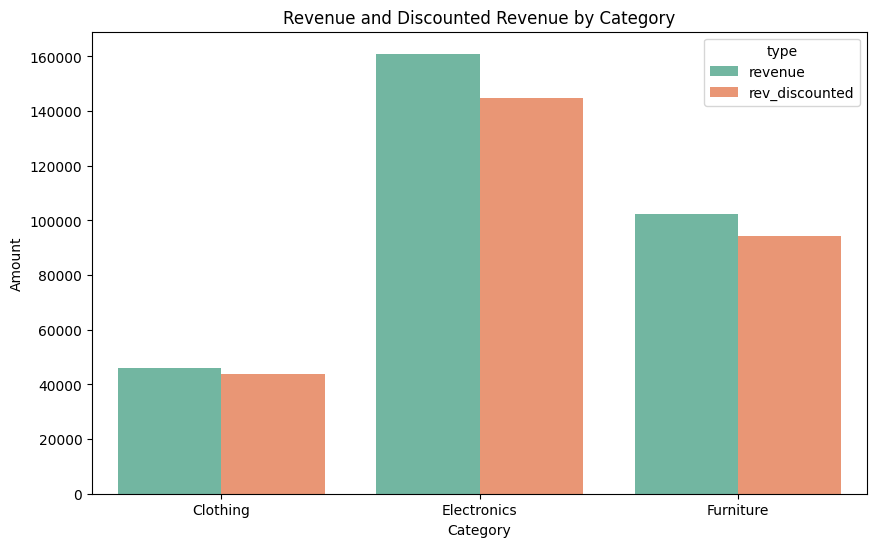

<Figure size 640x480 with 0 Axes>

In [93]:
discounts={"Electronics":0.10,"Clothing":0.05,"Furniture":0.08}
tdf["discounts_rate"]=tdf['category'].map(discounts)
display(tdf)
tdf["rev_discounted"]=tdf['revenue']*(1-tdf['discounts_rate'])
display(tdf)
comp=tdf.groupby("category",as_index=False)[["revenue","rev_discounted"]].sum()
comp = comp.melt(id_vars="category", var_name="type", value_name="amount")
print(comp)
plt.figure(figsize=(10,6))
sns.barplot(data=comp,x="category",y="amount",hue="type",palette="Set2")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.title("Revenue and Discounted Revenue by Category")
plt.show()
plt.savefig("bonus.png")

